In [13]:
import base64
import numpy as np
import requests
import json
import io
import base64
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [4]:
size = 1000
seed = 1000

In [5]:
# for determinism
np.random.seed(seed)

In [6]:
servers = ["localhost:3001", "localhost:3002", "localhost:3003"]

template = "http://{server}/update_pixel?X={x}&Y={y}&R={r}&G={g}&B={b}"

In [8]:
def get_image():
    get_image_url = "http://localhost:3001/json/image"
    image_response = requests.get(get_image_url)
    b64_image = json.loads(image_response.content)["data"]
    image = Image.open(io.BytesIO(base64.b64decode(b64_image)))
    
    return np.array(image)

In [21]:
def plot_image():
    plt.imshow(get_image()[:10, :10])
    plt.show()

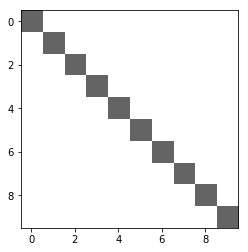

In [22]:
plot_image()

In [33]:
img_truth = np.zeros((size, size, 4), dtype=np.uint8)

for row in range(10):
    pixel = [100, 100, 100, 255]
    img_truth[row, row] = pixel
    url = template.format(
        server=servers[0],
        x=row,
        y=row,
        r=pixel[0],
        g=pixel[1],
        b=pixel[2],
    )
    requests.get(url)

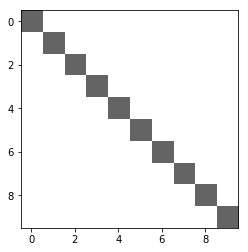

In [34]:
plt.imshow(img_truth[:10, :10])

In [40]:
assert np.allclose(img_truth, get_image())